In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# create
t = np.arange(0,10,0.25)

def my_sigmoid(t, A=0.25, k=1.25, C=-3):

    y = 1/(A + np.exp(-(k*t + C)))
    return y

def my_logit(y, A=0.25):
    return np.log(A*y/(1-A*y))

# Because there was random noise added to the y we fit
# the max value of y can be above 1/A
# this leads to undefined logit(y,A) = ln(Ay/(1-Ay))
# When calculating residuals of the logit, I ignore the nan points
def my_residuals(y,z):
    # y can have nans
    mask = ~np.isnan(y)
    y = y[mask]
    z = z[mask]
    
    return np.sum((y-z)**2)

sigma=0.15
randos = np.random.randn(len(t))*sigma    
y = my_sigmoid(t) + randos

ly = my_logit(y, A=0.25)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: invalid value encountered in log


In [4]:
print len(t), t
print len(y), y
print len(ly), ly

print y[-2]
A=0.25
print A*y[-2], 1-A*y[-2]

40 [ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75]
40 [  4.65081528e-02  -4.81447697e-04   2.92949815e-02   2.42749238e-01
   4.81611714e-02   8.72448865e-02   1.67540273e-01   3.13969937e-01
   6.66260761e-01   7.56387754e-01   8.67147177e-01   1.02213471e+00
   1.27977875e+00   1.78093284e+00   2.25346389e+00   2.44747319e+00
   2.32490720e+00   2.87817616e+00   3.19153186e+00   3.27433426e+00
   3.58802758e+00   3.78952510e+00   3.92953919e+00   3.91323912e+00
   3.87331375e+00   4.09773305e+00   4.06385769e+00   3.95159307e+00
   3.89240782e+00   3.97990225e+00   3.96491577e+00   4.15367928e+00
   3.90437608e+00   4.10113258e+00   3.97921745e+00   3.77906186e+00
   3.86723331e+00   4.13468686e+00   4.12711254e+00   3.64295229e+00]
40 [-4.44272685         nan -4.90928272 -2.73941382 -4.407

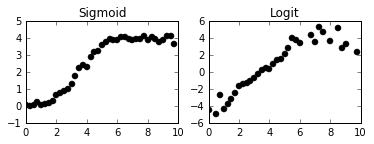

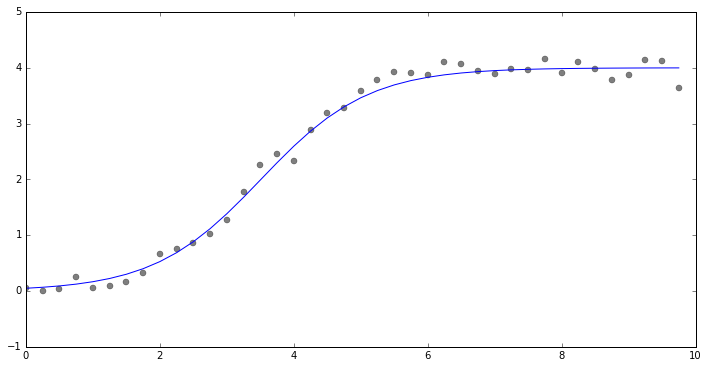

In [5]:
plt.subplot(2,2,1)
plt.plot(t,y,'ko', label='y 1/0.25+e(-(0.5t+3))')
plt.title('Sigmoid')

plt.subplot(2,2,2)
plt.plot(t,ly,'ko', label='log(Ay/(1-Ay))')
plt.title('Logit')

plt.figure(figsize=(12,6))
plt.plot(t,y,'ko', alpha=0.5)
plt.plot(t,my_sigmoid(t))

In [6]:
# Because there was random noise added to the y we fit
# the max value of y can be above 1/A
# this leads to undefined logit(y,A) = ln(Ay/(1-Ay))
# I plot as purple diamonds such points to show where they are

def logit_scatter_plotter(t,ly):
    mask = np.isnan(ly)
    ly1 = my_logit(my_sigmoid(t[np.isnan(ly)]))
#     print t, ly1, mask
    plt.plot(t[mask], ly1, 'd', color='purple', label='nan')
    plt.plot(t[~mask],ly[~mask],'ko', label='log(Ay/(1-Ay))', alpha=0.5)
    plt.plot(t, my_logit(my_sigmoid(t)), 'k:', label='best')

def sigmoid_scatter_plotter(t,y,ly):
    mask = np.isnan(ly)
    plt.plot(t[mask], y[mask], 'd', color='purple', label='logit(A)=nan')
    plt.plot(t[~mask],y[~mask],'ko', label='y=1/0.25+e(-(0.5t+3))', alpha=0.5) 
    plt.plot(t, my_sigmoid(t), 'k:', label='best')

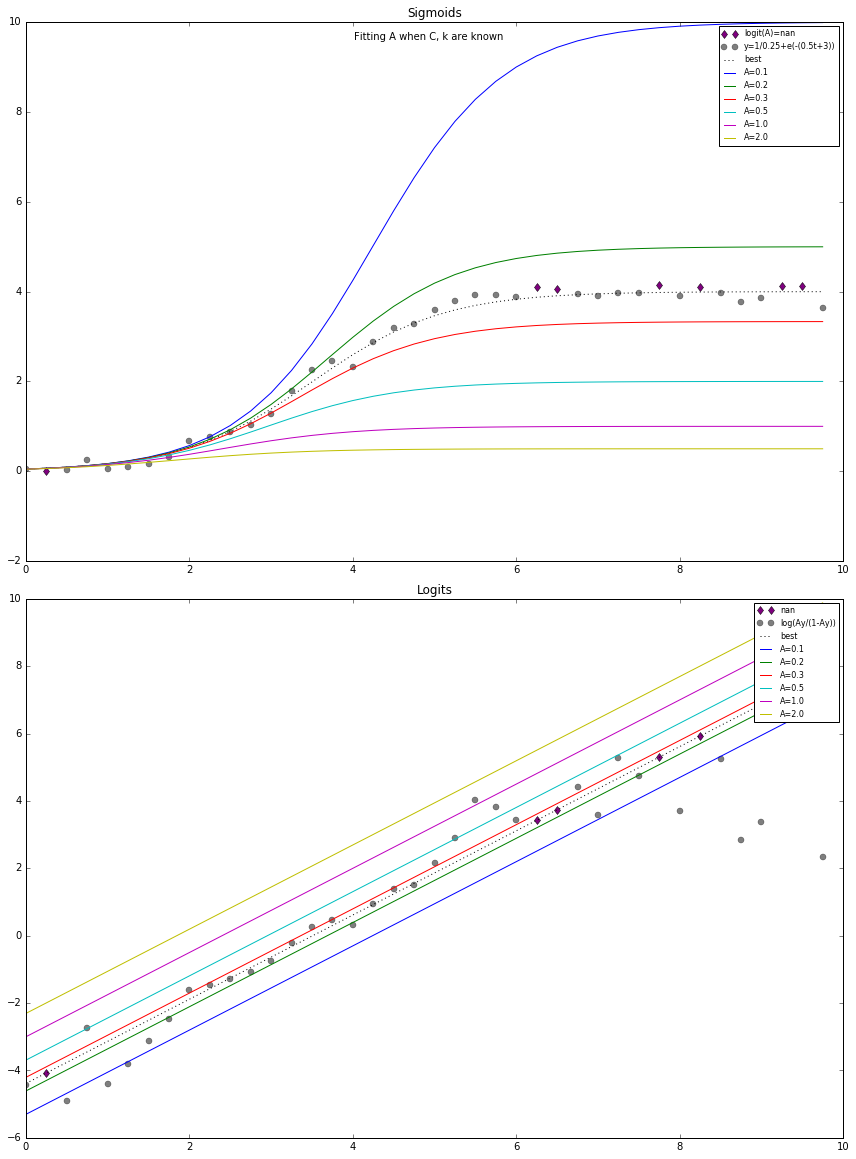

In [7]:
# consider a family of curves trying to guess the parameters
## FIND THE A    
As = [0.1, 0.2, 0.3, 0.5, 1.0, 2.0]

plt.figure(figsize=(12,24))
plt.subplot(3,1,1)
# plt.plot(t,y,'ko', label='y=1/0.25+e(-(0.5t+3))', alpha=0.5)
sigmoid_scatter_plotter(t,y,ly)
plt.subplot(3,1,2)
# plt.plot(t,ly,'ko', label='log(Ay/(1-Ay))', alpha=0.5)
logit_scatter_plotter(t,ly)
rz = []
rlz = []
for A in As:
    plt.subplot(3,1,1)
    z = my_sigmoid(t, A=A)
    plt.plot(t,z,label=('A=%s' % A))
    plt.subplot(3,1,2)
    lz = my_logit(z, A=A)
    plt.plot(t,lz,label=('A=%s' % A))
    rz.append(my_residuals(y,z))
    rlz.append(my_residuals(ly,lz))
plt.subplot(3,1,1)
plt.legend(fontsize=8)
plt.title('Sigmoids')

plt.subplot(3,1,2)
plt.legend(fontsize=8)
plt.title('Logits')

# plt.subplot(3,1,3)
# plt.plot(As, rz, label='z')
# plt.plot(As, rlz, '-o',label='lz')
# plt.axvline(0.25, color='k', linestyle=':')
# plt.legend(fontsize=8)
# plt.title('Residuals')

plt.tight_layout()
plt.suptitle('Fitting A when C, k are known')

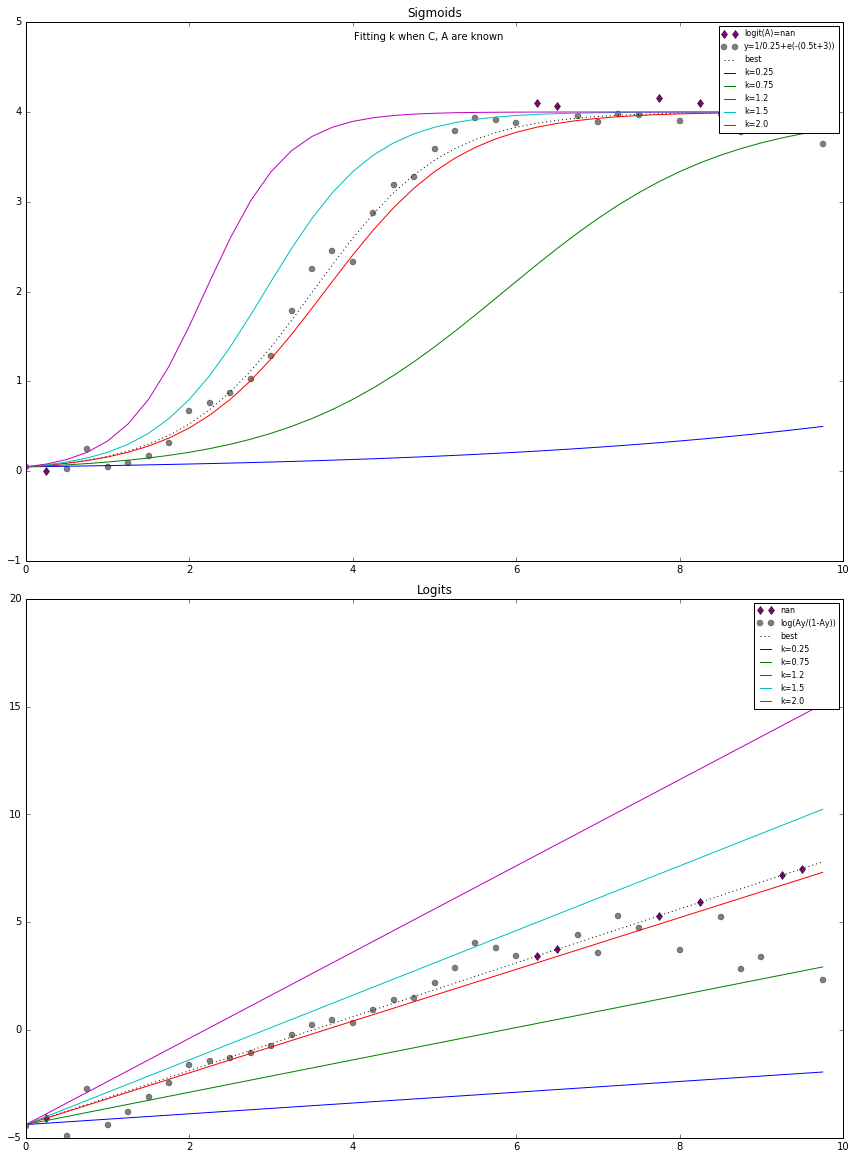

In [8]:
# consider a family of curves trying to guess the parameters
## FIND THE k's
    
ks = [0.25, 0.75, 1.2, 1.5, 2.0]

plt.figure(figsize=(12,24))
plt.subplot(3,1,1)
# plt.plot(t,y,'ko', label='y=1/0.25+e(-(0.5t+3))', alpha=0.5)
sigmoid_scatter_plotter(t,y,ly)
plt.subplot(3,1,2)
# plt.plot(t,ly,'ko', label='log(Ay/(1-Ay))', alpha=0.5)
logit_scatter_plotter(t,ly)
rz = []
rlz = []
for k in ks:
    plt.subplot(3,1,1)
    z = my_sigmoid(t, k=k)
    plt.plot(t,z,label=('k=%s' % k))
    plt.subplot(3,1,2)
    lz = my_logit(z)
    plt.plot(t,lz,label=('k=%s' % k))
    rz.append(my_residuals(y,z))
    rlz.append(my_residuals(ly,lz))
plt.subplot(3,1,1)
plt.legend(fontsize=8)
plt.title('Sigmoids')

plt.subplot(3,1,2)
plt.legend(fontsize=8)
plt.title('Logits')

# plt.subplot(3,1,3)
# plt.plot(ks, rz, label='z')
# plt.plot(ks, rlz, '-o',label='lz')
# plt.axvline(1.25, color='k', linestyle=':')
# plt.legend(fontsize=8)
# plt.title('Residuals')

plt.tight_layout()
plt.suptitle('Fitting k when C, A are known')

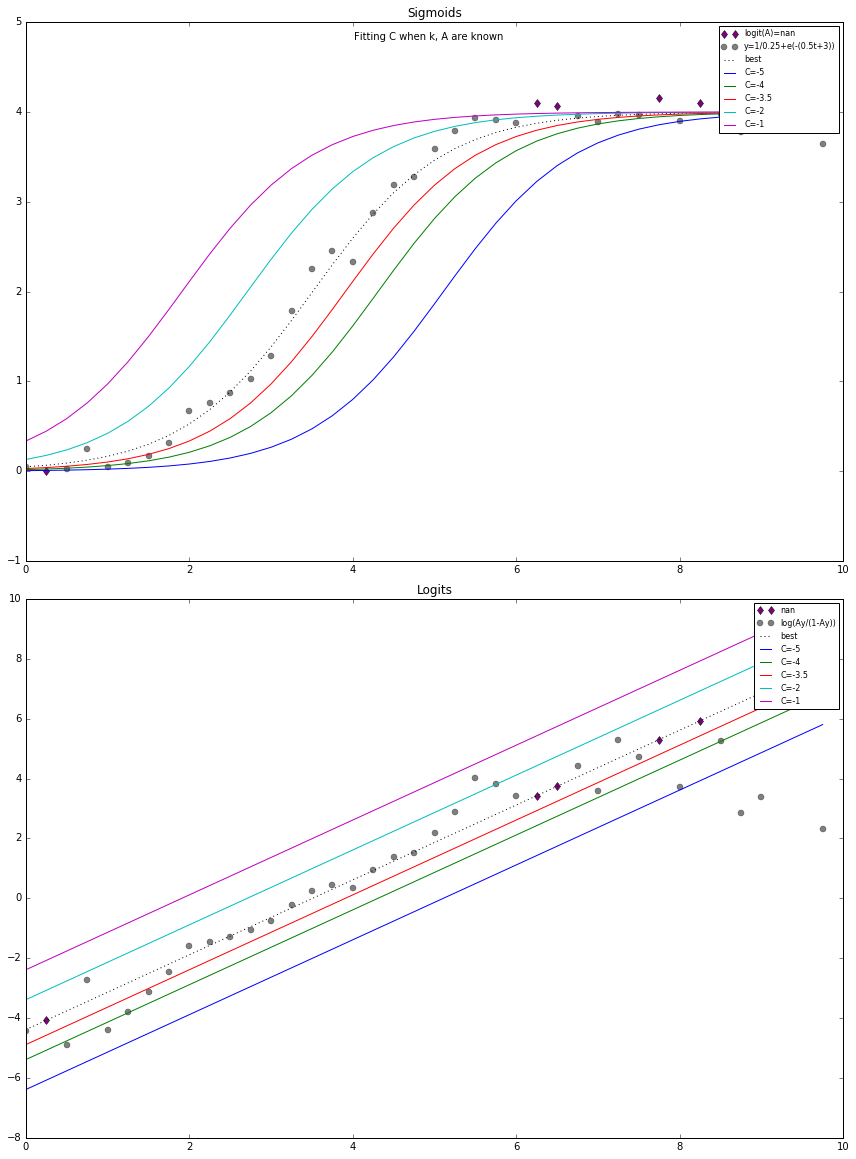

In [9]:
# consider a family of curves trying to guess the parameters
## FIND THE C's
    
Cs = [-5, -4, -3.5, -2, -1]

plt.figure(figsize=(12,24))
plt.subplot(3,1,1)
# plt.plot(t,y,'ko', label='y=1/0.25+e(-(0.5t+3))', alpha=0.5)
sigmoid_scatter_plotter(t,y,ly)
plt.subplot(3,1,2)
# plt.plot(t,ly,'ko', label='log(Ay/(1-Ay))', alpha=0.5)
logit_scatter_plotter(t,ly)
rz = []
rlz = []
for C in Cs:
    plt.subplot(3,1,1)
    z = my_sigmoid(t, C=C)
    plt.plot(t,z,label=('C=%s' % C))
    plt.subplot(3,1,2)
    lz = my_logit(z)
    plt.plot(t,lz,label=('C=%s' % C))
    rz.append(my_residuals(y,z))
    rlz.append(my_residuals(ly,lz))
plt.subplot(3,1,1)
plt.legend(fontsize=8)
plt.title('Sigmoids')

plt.subplot(3,1,2)
plt.legend(fontsize=8)
plt.title('Logits')

# plt.subplot(3,1,3)
# plt.plot(Cs, rz, label='z')
# plt.plot(Cs, rlz, '-o',label='lz')
# plt.axvline(-3, color='k', linestyle=':')
# plt.legend(fontsize=8)
# plt.title('Residuals')

plt.tight_layout()
plt.suptitle('Fitting C when k, A are known')

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide


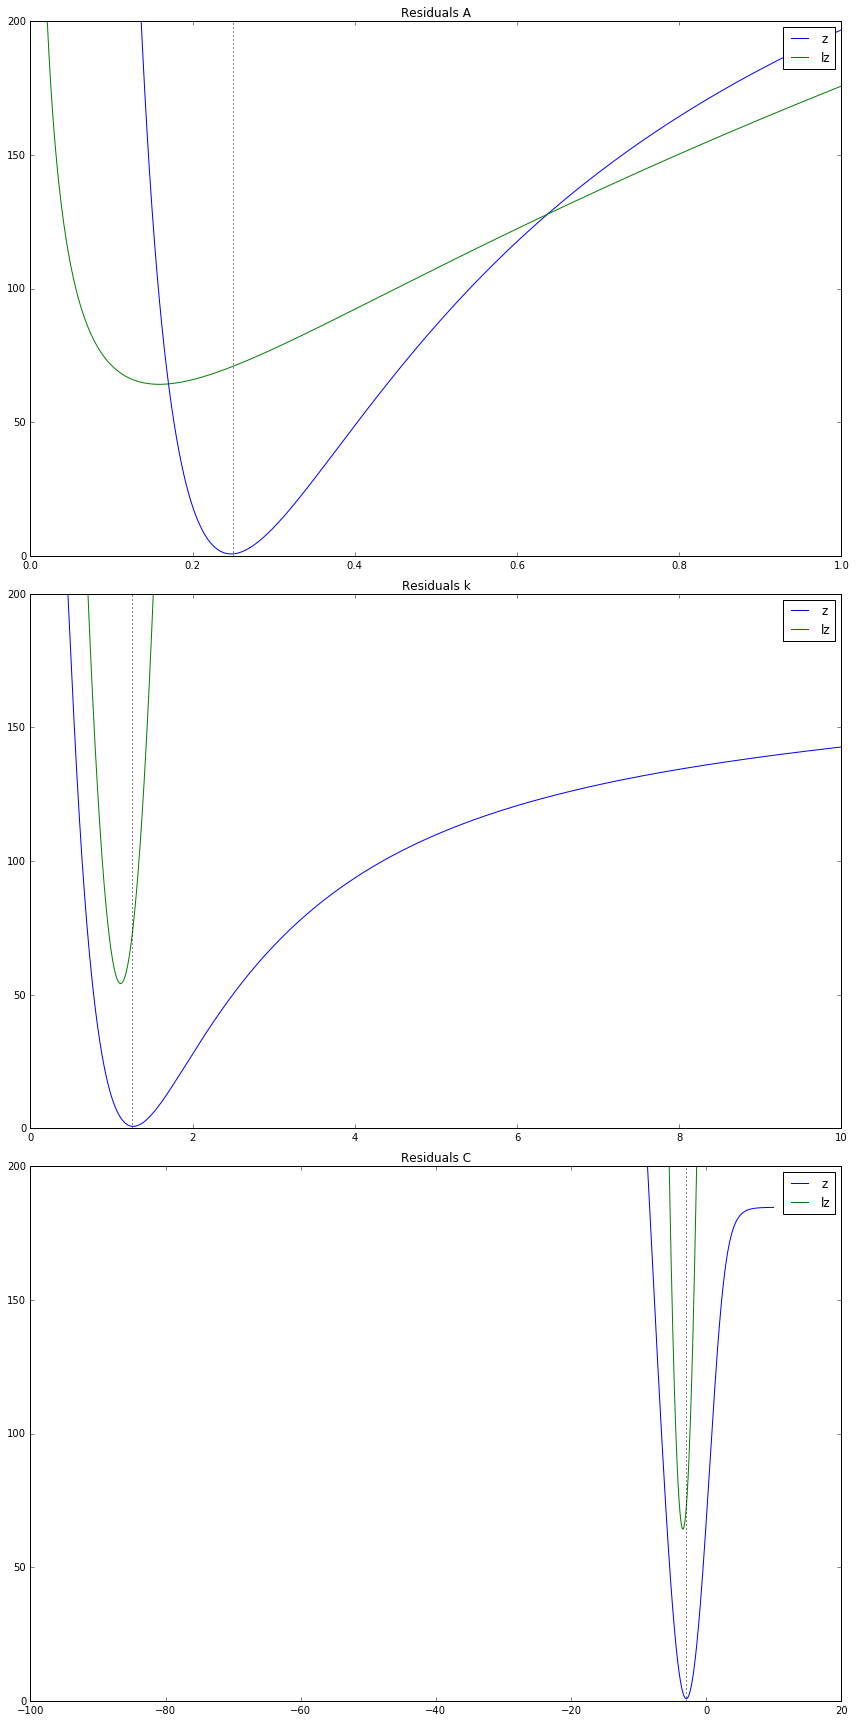

In [10]:
## Look at convexity of data
plt.figure(figsize=(12,24))

Cs = np.arange(-100,10,0.05)
rz = []
rlz = []
for C in Cs:
#     plt.subplot(3,1,1)
    z = my_sigmoid(t, C=C)
#     plt.plot(t,z,label=('C=%s' % C))
#     plt.subplot(3,1,2)
    lz = my_logit(z)
#     plt.plot(t,lz,label=('C=%s' % C))
    rz.append(my_residuals(y,z))
    rlz.append(my_residuals(ly,lz))
plt.subplot(3,1,3)
plt.plot(Cs, rz, label='z')
plt.plot(Cs, rlz, '-',label='lz')
plt.axvline(-3, color='k', linestyle=':')
plt.legend()
plt.title('Residuals C')
plt.ylim([0,200])

rz = []
rlz = []
ks = np.arange(0.0001, 10, 0.0005)
for k in ks:
#     plt.subplot(3,1,1)
    z = my_sigmoid(t, k=k)
#     plt.plot(t,z,label=('k=%s' % k))
#     plt.subplot(3,1,2)
    lz = my_logit(z)
#     plt.plot(t,lz,label=('k=%s' % k))
    rz.append(my_residuals(y,z))
    rlz.append(my_residuals(ly,lz))
    
plt.subplot(3,1,2)
plt.plot(ks, rz, label='z')
plt.plot(ks, rlz, '-',label='lz')
plt.axvline(1.25, color='k', linestyle=':')
plt.legend()
plt.title('Residuals k')
plt.ylim([0,200])

rz = []
rlz = []
As = np.arange(0.01, 1.0, 0.001)
for A in As:
#     plt.subplot(3,1,1)
    z = my_sigmoid(t, A=A)
#     plt.plot(t,z,label=('A=%s' % A))
#     plt.subplot(3,1,2)
    lz = my_logit(z, A=A)
#     plt.plot(t,lz,label=('A=%s' % A))
    rz.append(my_residuals(y,z))
    rlz.append(my_residuals(ly,lz))
    
    
plt.subplot(3,1,1)
plt.plot(As, rz, label='z')
plt.plot(As, rlz, '-',label='lz')
plt.axvline(0.25, color='k', linestyle=':')
plt.legend()
plt.title('Residuals A')
plt.ylim([0,200])

plt.tight_layout()

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide


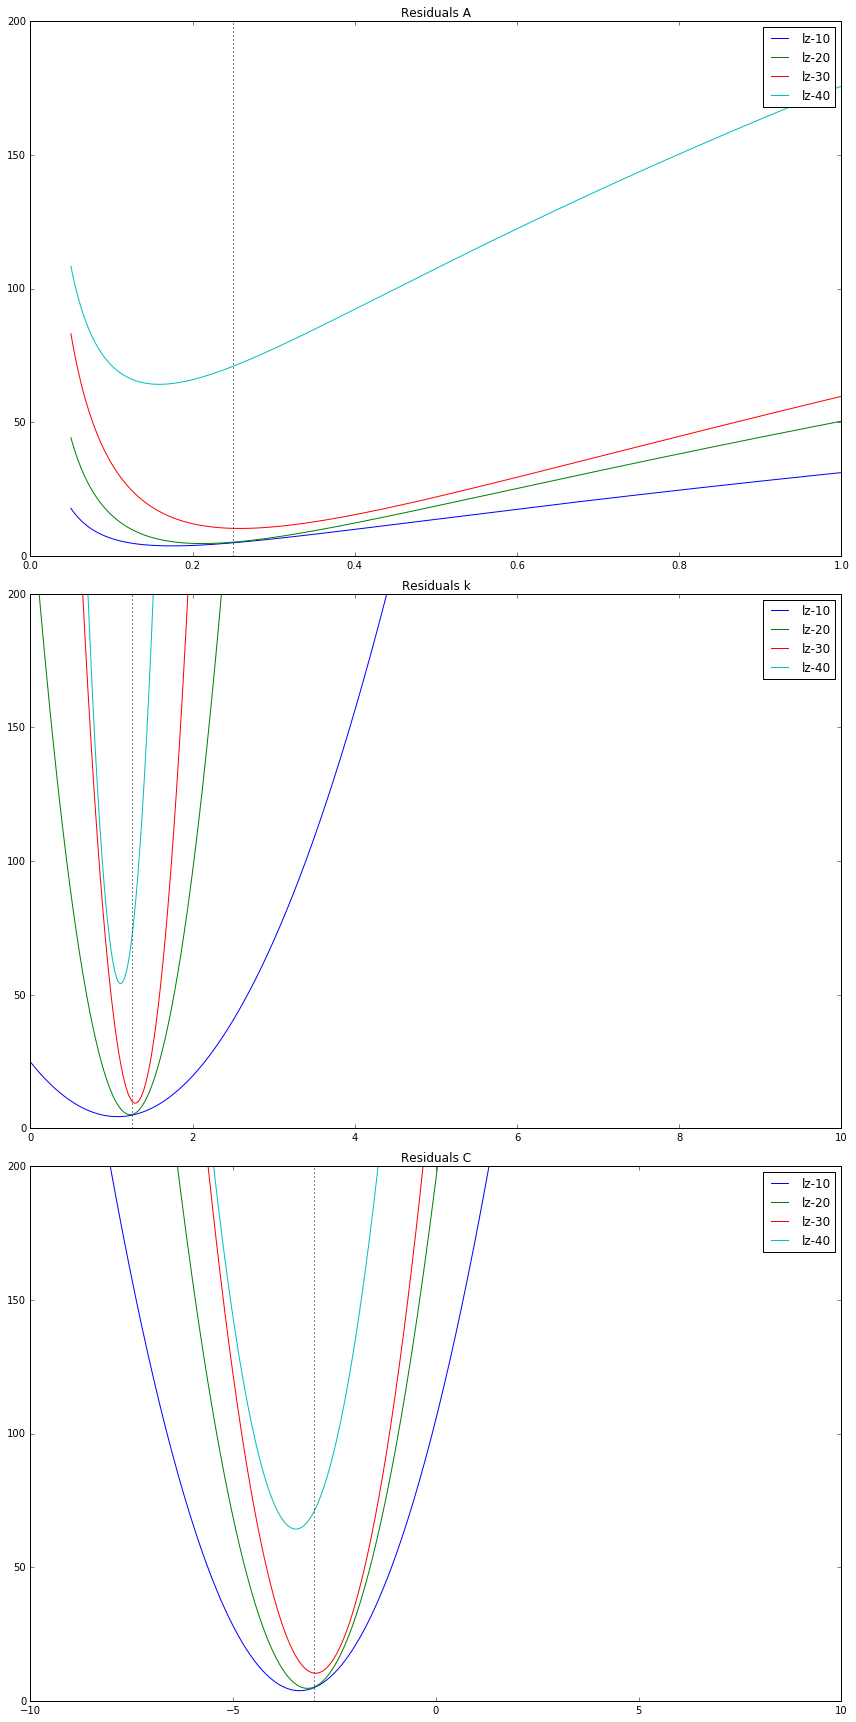

In [11]:
## Look at convexity of data with different proportions of the data fed in
tmaxs = [10, 20, 30,40]
plt.figure(figsize=(12,24))

for tmax in tmaxs:
    Cs = np.arange(-10,10,0.05)
    rz = []
    rlz = []
    for C in Cs:
    #     plt.subplot(3,1,1)
        z = my_sigmoid(t[:tmax], C=C)
    #     plt.plot(t,z,label=('C=%s' % C))
    #     plt.subplot(3,1,2)
        lz = my_logit(z)
    #     plt.plot(t,lz,label=('C=%s' % C))
        rz.append(my_residuals(y[:tmax],z[:tmax]))
        rlz.append(my_residuals(ly[:tmax],lz[:tmax]))
    plt.subplot(3,1,3)
#     plt.plot(Cs, rz, label=('z-%s' % tmax))
    plt.plot(Cs, rlz, '-',label=('lz-%s' % tmax))

    rz = []
    rlz = []
    ks = np.arange(0.01, 10, 0.0005)
    for k in ks:
    #     plt.subplot(3,1,1)
        z = my_sigmoid(t[:tmax], k=k)
    #     plt.plot(t,z,label=('k=%s' % k))
    #     plt.subplot(3,1,2)
        lz = my_logit(z)
    #     plt.plot(t,lz,label=('k=%s' % k))
        rz.append(my_residuals(y[:tmax],z[:tmax]))
        rlz.append(my_residuals(ly[:tmax],lz[:tmax]))

    plt.subplot(3,1,2)
#     plt.plot(ks, rz, label=('z-%s' % tmax))
    plt.plot(ks, rlz, label=('lz-%s' % tmax))


    rz = []
    rlz = []
    As = np.arange(0.05, 1.0, 0.001)
    for A in As:
    #     plt.subplot(3,1,1)
        z = my_sigmoid(t[:tmax], A=A)
    #     plt.plot(t,z,label=('A=%s' % A))
    #     plt.subplot(3,1,2)
        lz = my_logit(z, A=A)
    #     plt.plot(t,lz,label=('A=%s' % A))
        rz.append(my_residuals(y[:tmax],z[:tmax]))
        rlz.append(my_residuals(ly[:tmax],lz[:tmax]))
    plt.subplot(3,1,1)
#     plt.plot(As, rz, label=('z-%s' % tmax))
    plt.plot(As, rlz, label=('lz-%s' % tmax))
    
plt.subplot(3,1,3)
plt.axvline(-3, color='k', linestyle=':')
plt.legend()
plt.title('Residuals C')
plt.ylim([0,200])

plt.subplot(3,1,2)
plt.axvline(1.25, color='k', linestyle=':')
plt.legend()
plt.title('Residuals k')
plt.ylim([0,200])


plt.subplot(3,1,1)

plt.axvline(0.25, color='k', linestyle=':')
plt.legend()
plt.title('Residuals A')
plt.ylim([0,200])

plt.tight_layout()

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide


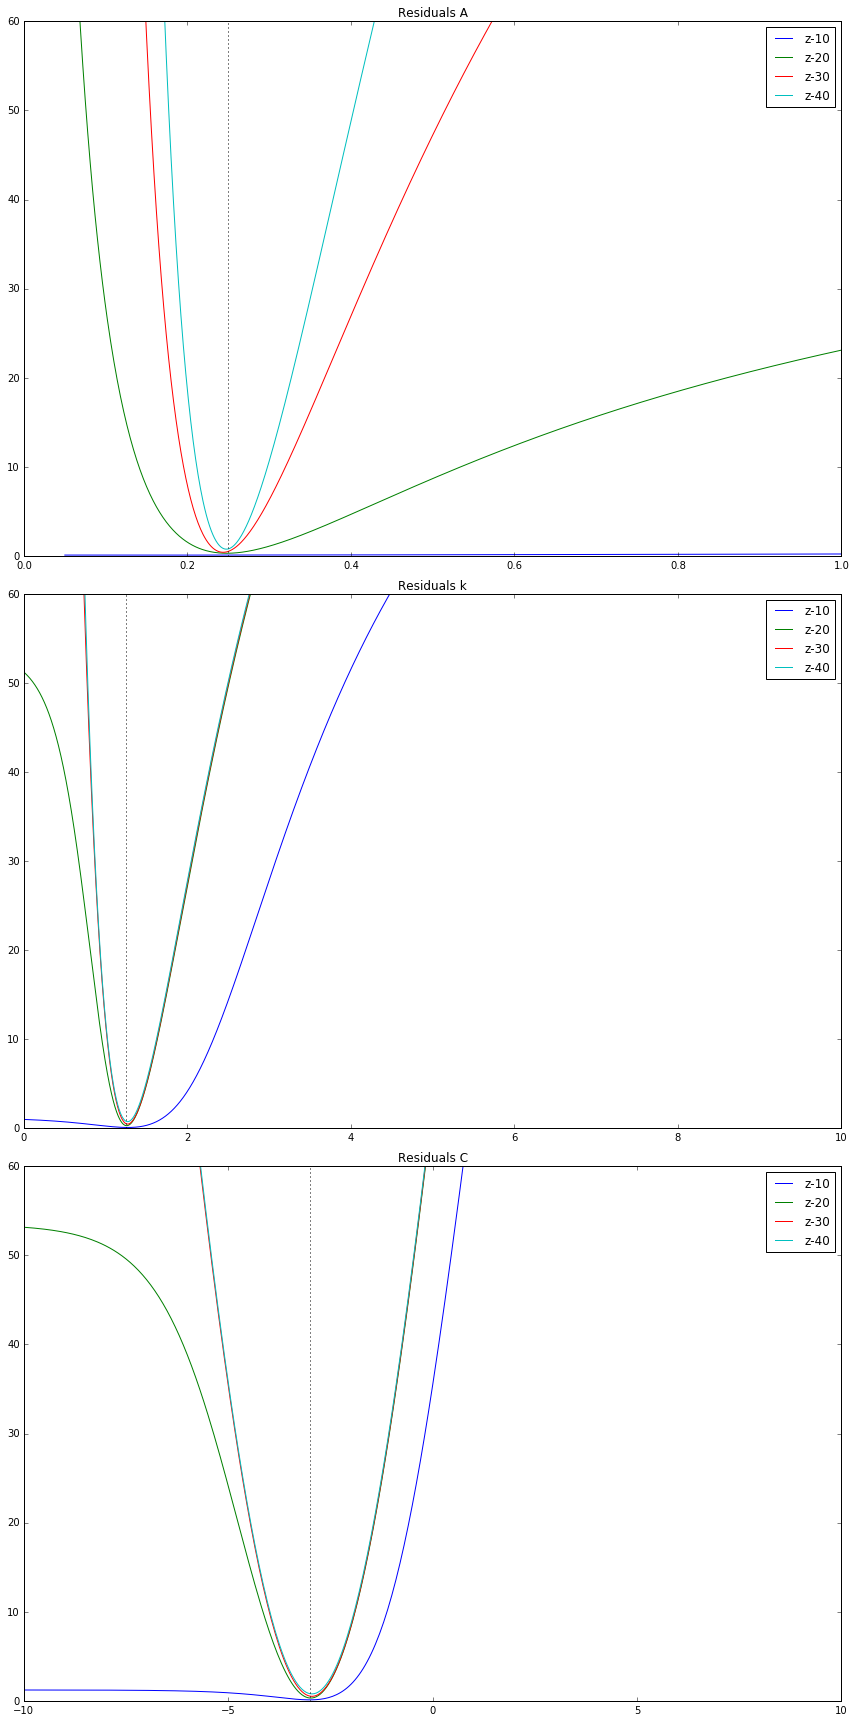

In [12]:
## Look at convexity of data with different proportions of the data fed in
tmaxs = [10, 20, 30,40]
plt.figure(figsize=(12,24))

for tmax in tmaxs:
    Cs = np.arange(-10,10,0.05)
    rz = []
    rlz = []
    for C in Cs:
    #     plt.subplot(3,1,1)
        z = my_sigmoid(t[:tmax], C=C)
    #     plt.plot(t,z,label=('C=%s' % C))
    #     plt.subplot(3,1,2)
        lz = my_logit(z)
    #     plt.plot(t,lz,label=('C=%s' % C))
        rz.append(my_residuals(y[:tmax],z[:tmax]))
        rlz.append(my_residuals(ly[:tmax],lz[:tmax]))
    plt.subplot(3,1,3)
    plt.plot(Cs, rz, label=('z-%s' % tmax))
#     plt.plot(Cs, rlz, '-',label=('lz-%s' % tmax))

    rz = []
    rlz = []
    ks = np.arange(0.01, 10, 0.0005)
    for k in ks:
    #     plt.subplot(3,1,1)
        z = my_sigmoid(t[:tmax], k=k)
    #     plt.plot(t,z,label=('k=%s' % k))
    #     plt.subplot(3,1,2)
        lz = my_logit(z)
    #     plt.plot(t,lz,label=('k=%s' % k))
        rz.append(my_residuals(y[:tmax],z[:tmax]))
        rlz.append(my_residuals(ly[:tmax],lz[:tmax]))

    plt.subplot(3,1,2)
    plt.plot(ks, rz, label=('z-%s' % tmax))
#     plt.plot(ks, rlz, label=('lz-%s' % tmax))


    rz = []
    rlz = []
    As = np.arange(0.05, 1.0, 0.001)
    for A in As:
    #     plt.subplot(3,1,1)
        z = my_sigmoid(t[:tmax], A=A)
    #     plt.plot(t,z,label=('A=%s' % A))
    #     plt.subplot(3,1,2)
        lz = my_logit(z, A=A)
    #     plt.plot(t,lz,label=('A=%s' % A))
        rz.append(my_residuals(y[:tmax],z[:tmax]))
        rlz.append(my_residuals(ly[:tmax],lz[:tmax]))
    plt.subplot(3,1,1)
    plt.plot(As, rz, label=('z-%s' % tmax))
#     plt.plot(As, rlz, label=('lz-%s' % tmax))
    
plt.subplot(3,1,3)
plt.axvline(-3, color='k', linestyle=':')
plt.legend()
plt.title('Residuals C')
plt.ylim([0,60])

plt.subplot(3,1,2)
plt.axvline(1.25, color='k', linestyle=':')
plt.legend()
plt.title('Residuals k')
plt.ylim([0,60])


plt.subplot(3,1,1)

plt.axvline(0.25, color='k', linestyle=':')
plt.legend()
plt.title('Residuals A')
plt.ylim([0,60])

plt.tight_layout()

In [13]:
len(t)

40

A,k,C =  [ 0.24949343  1.34086413 -3.27476793]
Std error of A,k,C [ 0.00225298  0.0645241   0.22264647]
Cov of A,k,C:
[[  5.07590880e-06   6.34408781e-05  -1.79998689e-04]
 [  6.34408781e-05   4.16335909e-03  -1.39734767e-02]
 [ -1.79998689e-04  -1.39734767e-02   4.95714525e-02]]


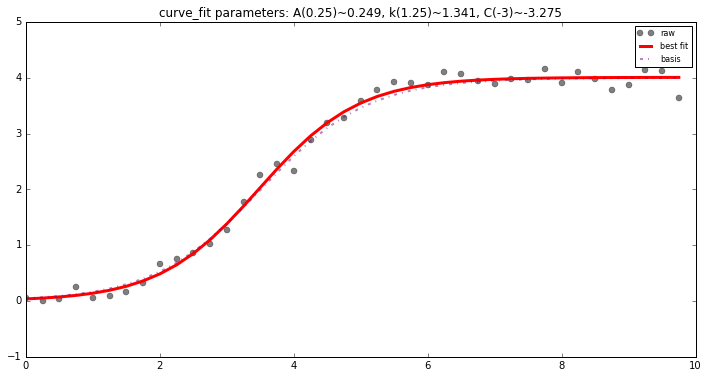

In [14]:
## Now try to fit, using scipy's curve_fit
from scipy.optimize import curve_fit

# def my_func(t, A=0.25, k=1.25, C=-3):
def my_func(t,A,k,C):
    y = 1/(A + np.exp(-(k*t + C)))
    return y

popt, pcov = curve_fit(my_func, t, y, p0=[1,1,-4])
perr = np.sqrt(np.diag(pcov))

print 'A,k,C = ', popt
print 'Std error of A,k,C', perr
print 'Cov of A,k,C:'
print pcov

plt.figure(figsize=(12,6))
plt.plot(t,y, 'ko', alpha=0.5, label='raw')
plt.plot(t,my_func(t, popt[0], popt[1], popt[2]), 'r', linewidth=3, label='best fit')
plt.plot(t, my_sigmoid(t), color='purple', linestyle='-.', linewidth=2, label='basis', alpha=0.5)
plt.legend(fontsize=8)
plt.title(('curve_fit parameters: A(0.25)~%0.3f, k(1.25)~%0.3f, C(-3)~%0.3f' % (popt[0], popt[1], popt[2])))

In [15]:
# sensitivity of parameters to inital guess
Cs = np.arange(-10,10,0.5)
As = np.arange(0.05, 0.95, 0.01)
ks = np.arange(0.2, 10, 0.05)

Cpred = []
kpred = []
Apred = []
print 'C...'
for C in Cs:
#     print ' ', C
    popt, pcov = curve_fit(my_func, t, y, p0=[1,1,C])
    Cpred.append(popt[2])

print 'k...'
for k in ks:
#     print ' ', k
    popt, pcov = curve_fit(my_func, t, y, p0=[1,k,-4])
    kpred.append(popt[1])

print 'A...'
for A in As:
#     print ' ', A
    popt, pcov = curve_fit(my_func, t, y, p0=[A,1,-4])
    Apred.append(popt[0])
    


C...
k...
A...


//anaconda/lib/python2.7/site-packages/scipy/optimize/minpack.py:604: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: overflow encountered in exp


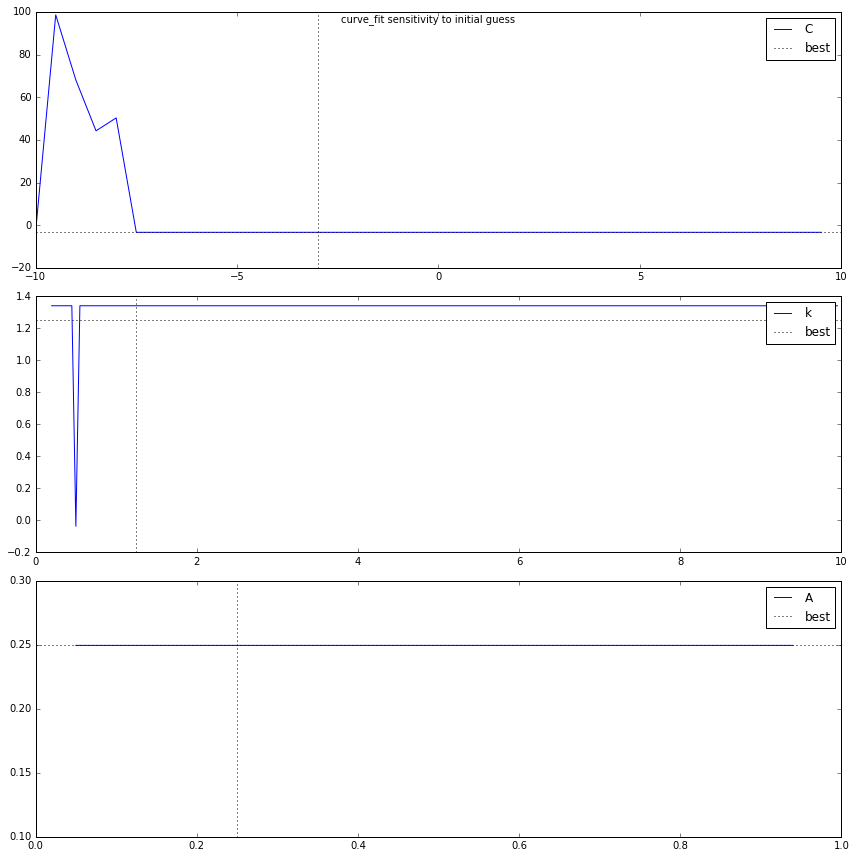

In [16]:
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.plot(Cs, Cpred, label='C')
plt.axhline(-3, color='k', linestyle=':', label='best')
plt.axvline(-3, color='k', linestyle=':')
plt.legend()
plt.subplot(3,1,2)
plt.plot(ks,kpred, label='k')
plt.axhline(1.25, color='k', linestyle=':', label='best')
plt.axvline(1.25, color='k', linestyle=':')
plt.legend()
plt.subplot(3,1,3)
plt.plot(As, Apred, label='A')
plt.axhline(0.25, color='k', linestyle=':', label='best')
plt.axvline(0.25, color='k', linestyle=':')
plt.ylim([0.1, 0.3])
plt.legend()
plt.suptitle('curve_fit sensitivity to initial guess')
plt.tight_layout()

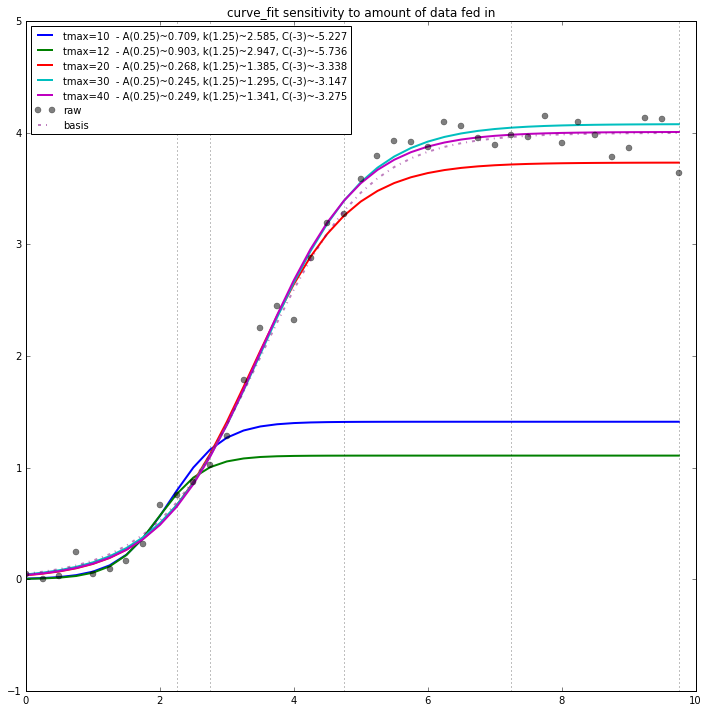

In [17]:
tmaxs = [10,12,20, 30,40]
plt.figure(figsize=(12,12))

for tmax in tmaxs:
    popt, pcov = curve_fit(my_func, t[:tmax], y[:tmax], p0=[0.3,1,-4])
#     perr = np.sqrt(np.diag(pcov))
    plt.plot(t,my_func(t, popt[0], popt[1], popt[2]), linewidth=2, label=('tmax=%d  - A(0.25)~%0.3f, k(1.25)~%0.3f, C(-3)~%0.3f' % (tmax, popt[0], popt[1], popt[2])))
    plt.axvline(t[tmax-1], color='k', linestyle=':', alpha=0.5)
plt.plot(t,y, 'ko', alpha=0.5, label='raw')
plt.plot(t, my_sigmoid(t), color='purple', linestyle='-.', linewidth=2, label='basis', alpha=0.5)
plt.legend(fontsize=10, loc=2)
plt.title('curve_fit sensitivity to amount of data fed in')

In [18]:
# conclusions - with only some of the data fed in, you can't fit a sigmoid appropriately